In [1]:
# Import libraries and load dataset
import os
import sys
import importlib
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

import common.common as common
importlib.reload(common)

df = pd.read_csv("Data.csv")

yr = list(df.yr)
df = df.set_index("yr")
df["yr"] = yr
df

,inbtou_volume,inbtou_spending,covid19_cases,covid19_deaths,covid19_mortality,yr
yr,,,,,,
2010,9580.0,5875600.0,0,0,0.000000,2010
2011,10470.0,5150400.0,0,0,0.000000,2011
2012,12130.0,6974500.0,0,0,0.000000,2012
2013,10460.0,6741400.0,0,0,0.000000,2013
2014,12330.0,8162200.0,0,0,0.000000,2014
2015,15090.0,8413800.0,0,0,0.000000,2015
2016,15360.0,8428600.0,0,0,0.000000,2016
2017,19520.0,9327700.0,0,0,0.000000,2017
2018,18340.0,9838300.0,0,0,0.000000,2018


Estimated COVID-19 effect: -16900 ± 2284 (95% confidence)


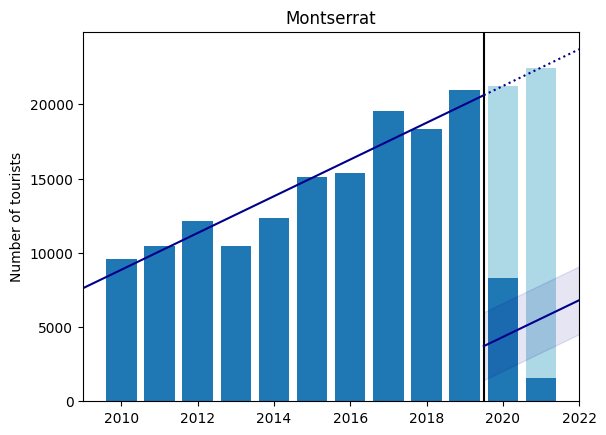

                            OLS Regression Results                            
Dep. Variable:      log_inbtou_volume   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     242.7
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           3.42e-08
Time:                        15:34:15   Log-Likelihood:                 15.286
No. Observations:                  12   AIC:                            -22.57
Df Residuals:                       8   BIC:                            -20.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -170

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1934: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Fra

In [3]:
# Set up plot
plt.title('Montserrat')
plt.ylabel('Number of tourists')
plt.xlim(2009, 2022)
y_name = 'inbtou_volume'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -7526905 ± 1063702 (95% confidence)


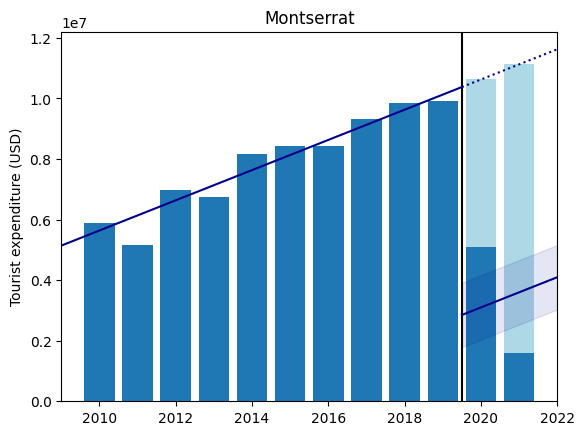

                             OLS Regression Results                            
Dep. Variable:     log_inbtou_spending   R-squared:                       0.982
Model:                             OLS   Adj. R-squared:                  0.976
Method:                  Least Squares   F-statistic:                     148.1
Date:                 Wed, 26 Apr 2023   Prob (F-statistic):           2.39e-07
Time:                         15:37:32   Log-Likelihood:                 15.977
No. Observations:                   12   AIC:                            -23.95
Df Residuals:                        8   BIC:                            -22.01
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept         

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1934: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Fra

In [5]:
# Set up plot
plt.title('Montserrat')
plt.ylabel('Tourist expenditure (USD)')
plt.xlim(2009, 2022)
y_name = 'inbtou_spending'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)